In [47]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'air-traffic-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F270572%2F561627%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240712%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240712T103211Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6e1c98894f74604291efa92a1937ee1d89dcd44bf2219ebeefdd91d8102ec3634726434a9e21e2d83a2ede5d9cced14638b92ef0cf46ad07fb586c6b5602ec12a5559295bf866e644774c851f3aed8719e5a9bd50233b9fa8eb3ea7d4177013b75f29bb79891f431d458d50727303353a89d973e62dc7112e5a1d9b7150c4dc71feafa0501a62cc1a538e1c05d98649634193fe9384dace1d73f7cb81f12000b4dde3391e96f6792ee9feed7f0f29a02458f95cf43de02534f37ea4e11bcbd60e6f132890a3ff8739ed63baa840b7a59a24fe4c67765a8ca6e8fdc1af87da19f4687adbbab830a093fe4f391e1be75ba3ab0cc77be8dd477d6697313cc7afbca'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 176707 bytes downloaded
Downloaded and uncompressed: air-traffic-data
Data source import complete.


In [48]:
import numpy as np # linear algebra
import pandas as pd
df= pd.read_csv('/kaggle/input/air-traffic-data/air_traffic_data.csv')
df.head(5)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [49]:
# prompt: unique values in each column

for col in df.columns:
  print(f"Unique values in column '{col}': {df[col].unique()}")


Unique values in column 'Activity Period': [200507 200508 200509 200510 200511 200604 200512 200601 200602 200603
 200605 200607 200606 200608 200609 200707 200610 200611 200612 200701
 200702 200703 200704 200705 200706 200708 200709 200805 200710 200711
 200712 200801 200802 200803 200804 201103 200806 201107 201110 200807
 200808 200809 200810 200811 200812 200901 201206 200902 200903 200904
 200905 200906 200907 200908 200909 200910 200911 200912 201001 201002
 201003 201004 201005 201006 201007 201008 201009 201010 201011 201012
 201101 201102 201104 201105 201106 201108 201109 201111 201112 201201
 201202 201203 201204 201205 201207 201208 201209 201210 201211 201212
 201306 201301 201302 201303 201304 201305 201307 201308 201309 201310
 201407 201311 201312 201507 201401 201402 201403 201404 201405 201406
 201603 201408 201409 201410 201411 201412 201501 201502 201503 201504
 201505 201506 201508 201509 201510 201511 201512 201601 201602]
Unique values in column 'Operating Airli

In [50]:
# prompt: check for any null values

df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [51]:
# # prompt: group by Operating Airline and print first 10

# grouped_df = df.groupby('Operating Airline')
# grouped_df.head(10)

grouped_by_airline = df.groupby("Operating Airline").agg\
({
    "Operating Airline IATA Code" : "count",
    "Passenger Count" : lambda x : np.mean(x), #mean passengers count by airlines
    "Adjusted Passenger Count" : lambda x : np.mean(x) #mean adjusted passengerscount by airlines

})

grouped_by_airline.rename(columns = {"Operating Airline IATA Code" : "nb_flights",
                                   "Passenger Count" : "mean_passenger_count",
                                   "Adjusted Passenger Count" : "mean_adjusted_passenger_count"},
                          inplace = True)

grouped_by_airline = grouped_by_airline.sort_values(by = "nb_flights", ascending = False)

grouped_by_airline.head(10).round()

,nb_flights,mean_passenger_count,mean_adjusted_passenger_count
Operating Airline,,,
United Airlines - Pre 07/01/2013,2154,48915.0,49366.0
SkyWest Airlines,963,37084.0,37084.0
United Airlines,892,72732.0,72827.0
Alaska Airlines,751,17252.0,17565.0
Delta Air Lines,386,68498.0,68515.0
Air Canada,366,18252.0,18252.0
Virgin America,362,74405.0,74405.0
Southwest Airlines,309,81188.0,81223.0
US Airways,304,55318.0,55318.0


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 [Text(-10.0, 0, 'Independence Air'),
  Text(0.0, 0, 'United Airlines - Pre 07/01/2013'),
  Text(10.0, 0, 'Frontier Airlines'),
  Text(20.0, 0, 'KLM Royal Dutch Airlines'),
  Text(30.0, 0, 'Northwest Airlines'),
  Text(40.0, 0, 'Midwest Airlines'),
  Text(50.0, 0, 'Air Berlin'),
  Text(60.0, 0, 'Ameriflight'),
  Text(70.0, 0, 'Evergreen International Airlines'),
  Text(80.0, 0, '')])

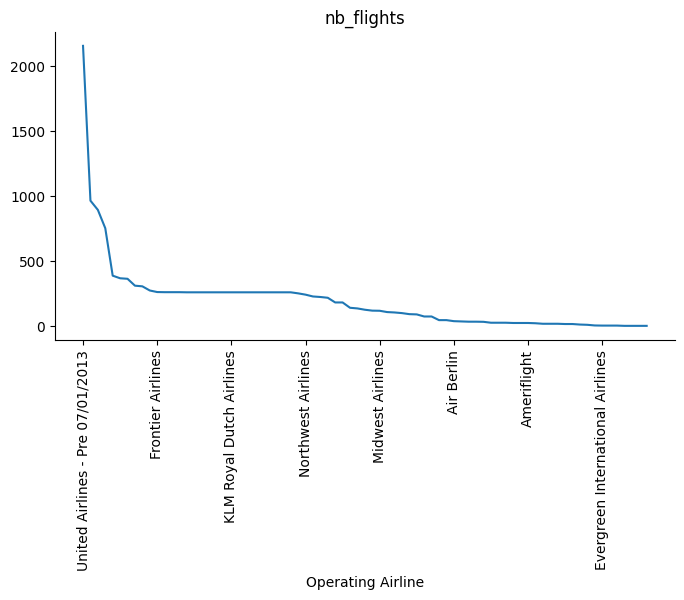

In [52]:
# @title nb_flights

from matplotlib import pyplot as plt
grouped_by_airline['nb_flights'].plot(kind='line', figsize=(8, 4), title='nb_flights')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xticks(rotation=90)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 [Text(-10.0, 0, 'Independence Air'),
  Text(0.0, 0, 'United Airlines - Pre 07/01/2013'),
  Text(10.0, 0, 'Frontier Airlines'),
  Text(20.0, 0, 'KLM Royal Dutch Airlines'),
  Text(30.0, 0, 'Northwest Airlines'),
  Text(40.0, 0, 'Midwest Airlines'),
  Text(50.0, 0, 'Air Berlin'),
  Text(60.0, 0, 'Ameriflight'),
  Text(70.0, 0, 'Evergreen International Airlines'),
  Text(80.0, 0, '')])

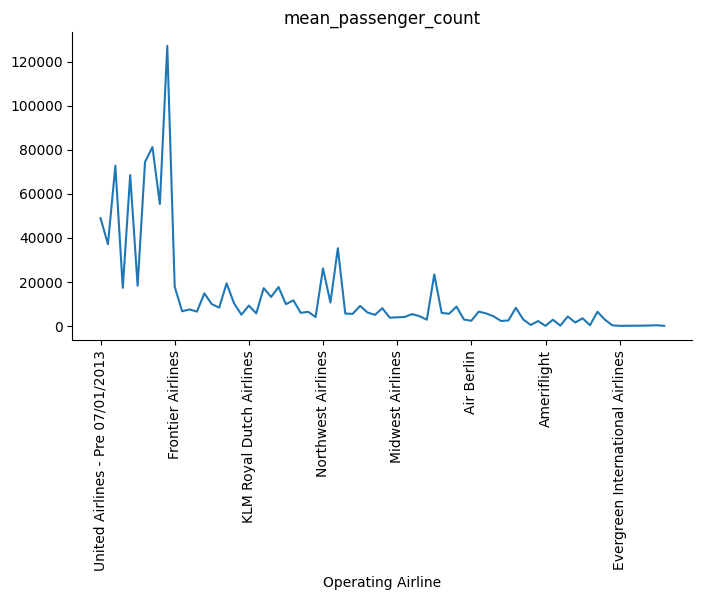

In [53]:
# @title mean_passenger_count

from matplotlib import pyplot as plt
grouped_by_airline['mean_passenger_count'].plot(kind='line', figsize=(8, 4), title='mean_passenger_count')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xticks(rotation=90)

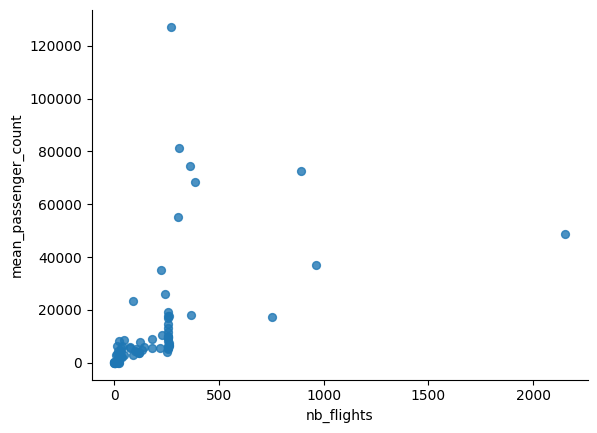

In [54]:
# @title nb_flights vs mean_passenger_count

from matplotlib import pyplot as plt
grouped_by_airline.plot(kind='scatter', x='nb_flights', y='mean_passenger_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

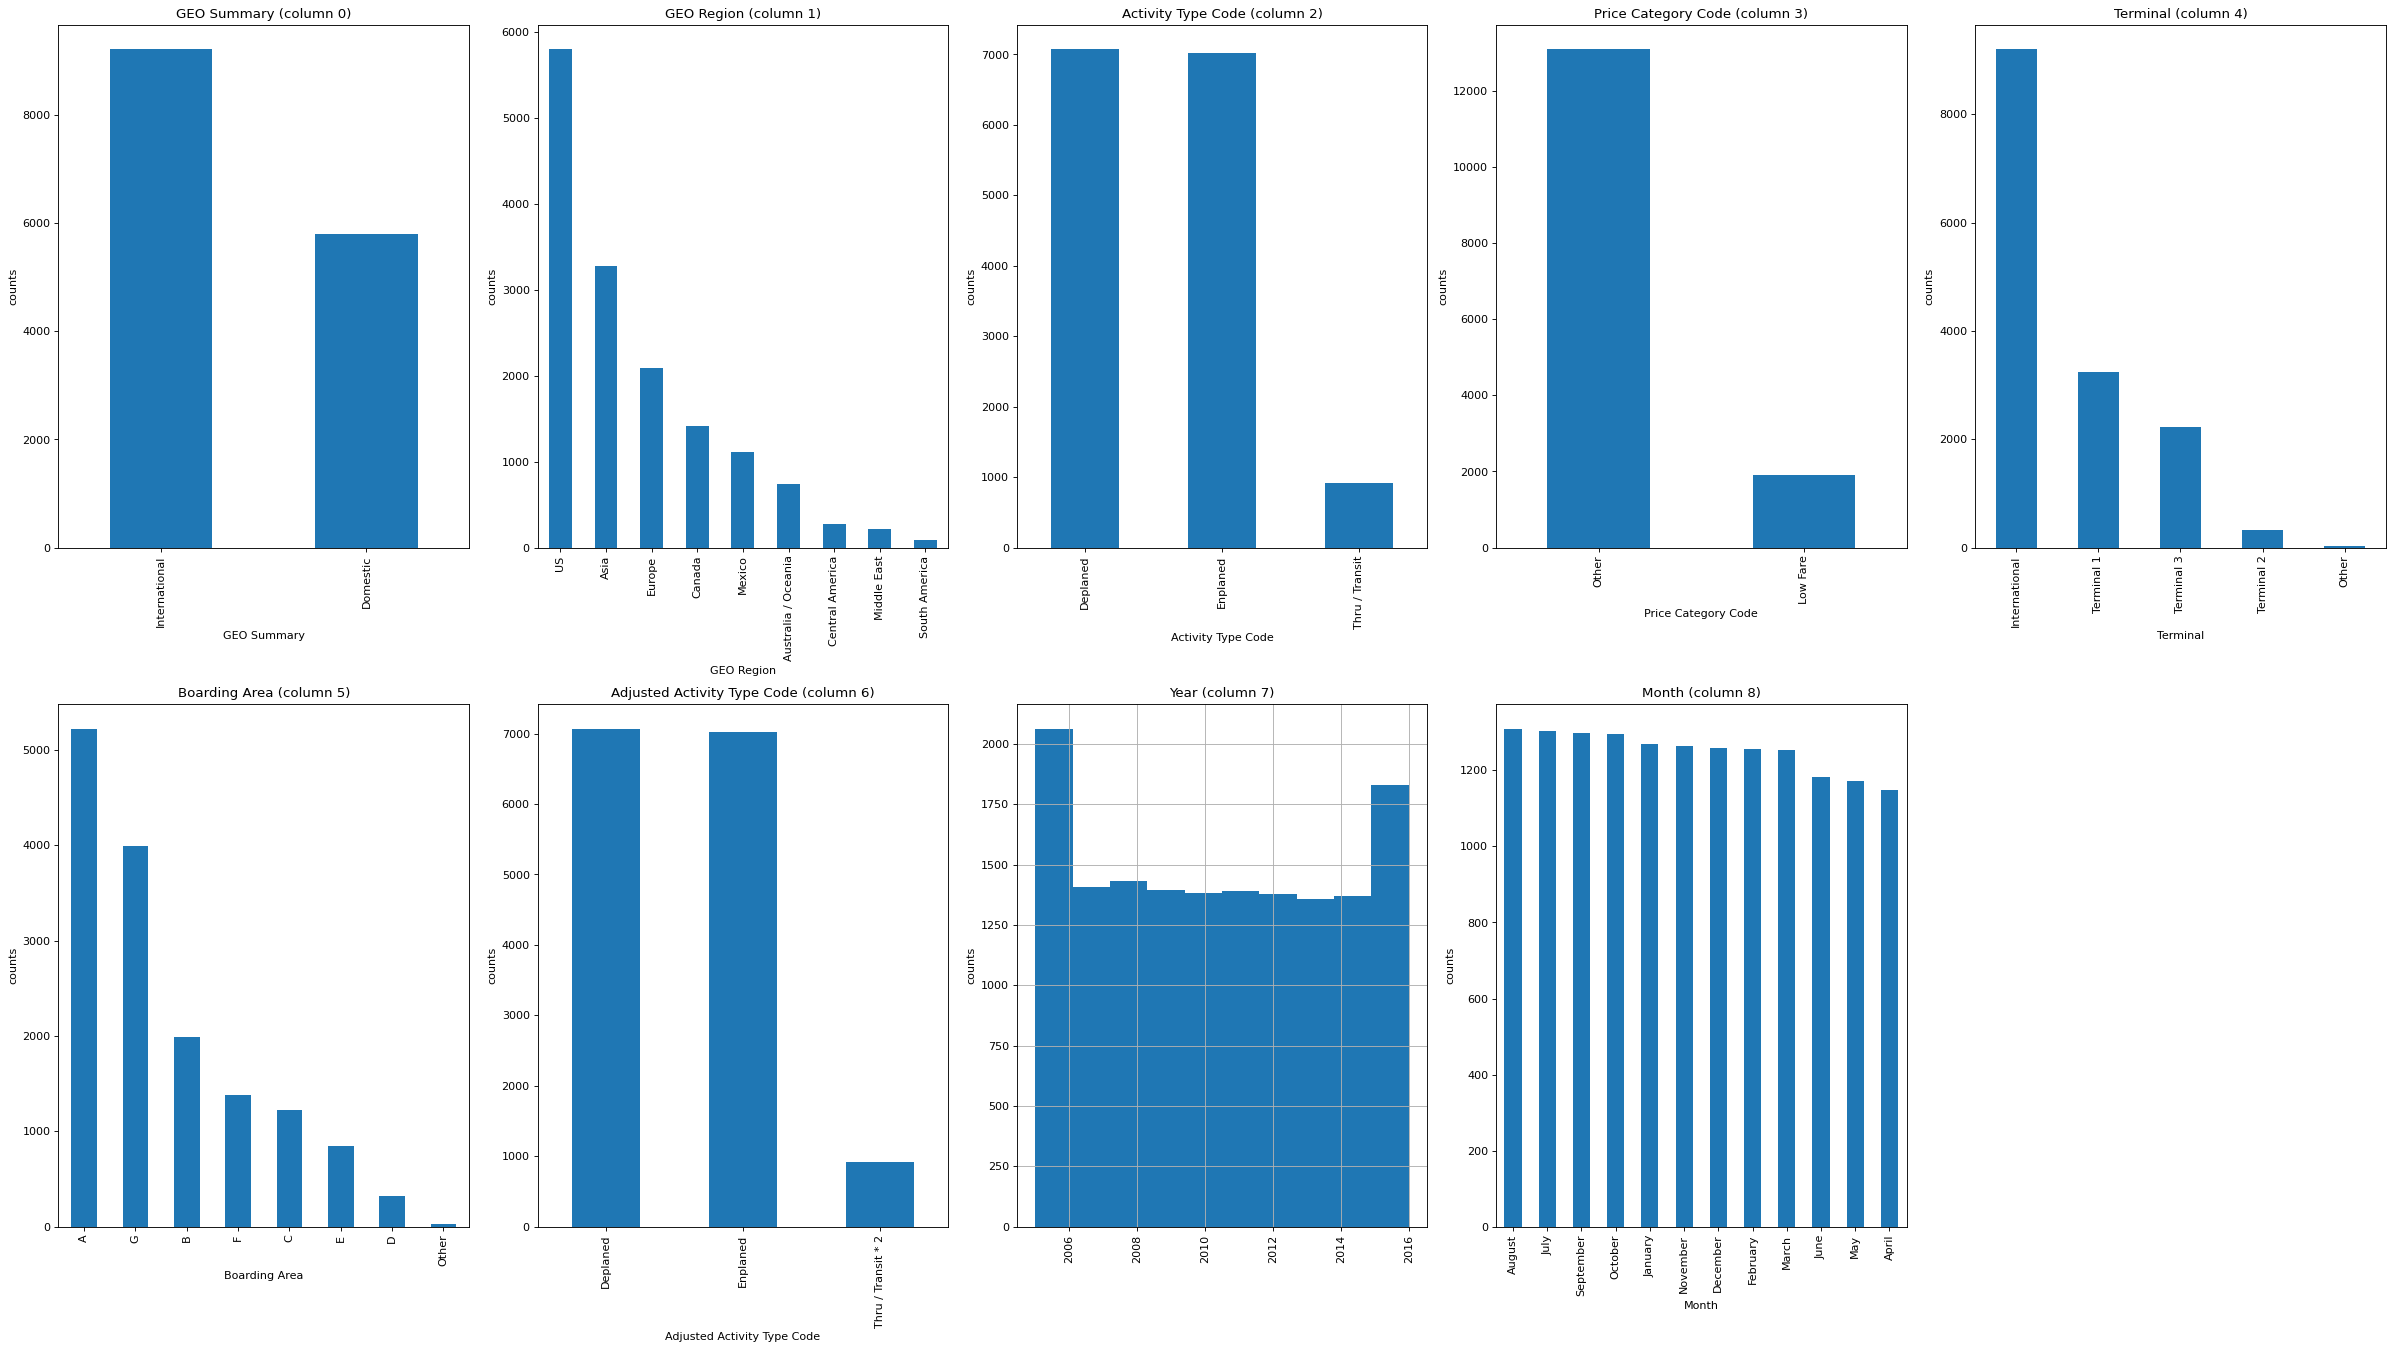

In [55]:
# Distribution graphs (histogram/bar graph) of column data
import matplotlib.pyplot as plt
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    # nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    nGraphRow = int(np.ceil((nCol + nGraphPerRow - 1) / nGraphPerRow))
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(df, 10, 5)

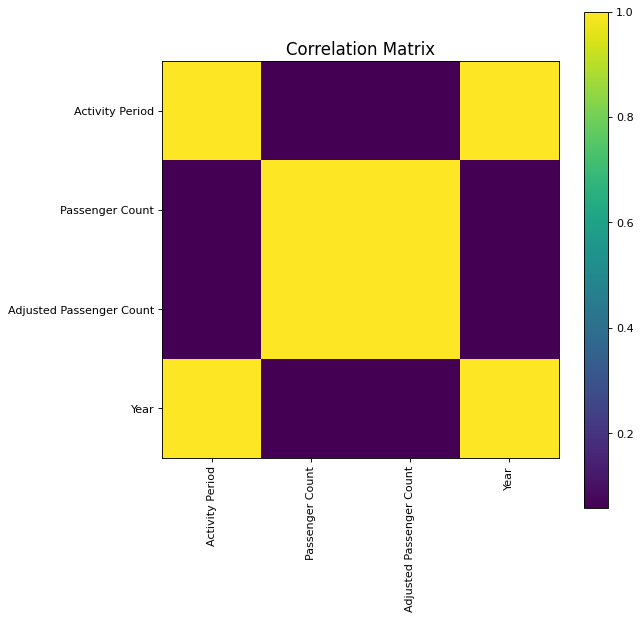

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plotCorrelationMatrix(df, graphWidth):
    # Drop columns with NaN values
    df = df.dropna(axis=1)

    # Keep only numeric columns
    df = df.select_dtypes(include=[np.number])

    # Keep columns where there are more than 1 unique value
    df = df[[col for col in df if df[col].nunique() > 1]]

    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return

    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix', fontsize=15)
    plt.show()

plotCorrelationMatrix(df, 8)


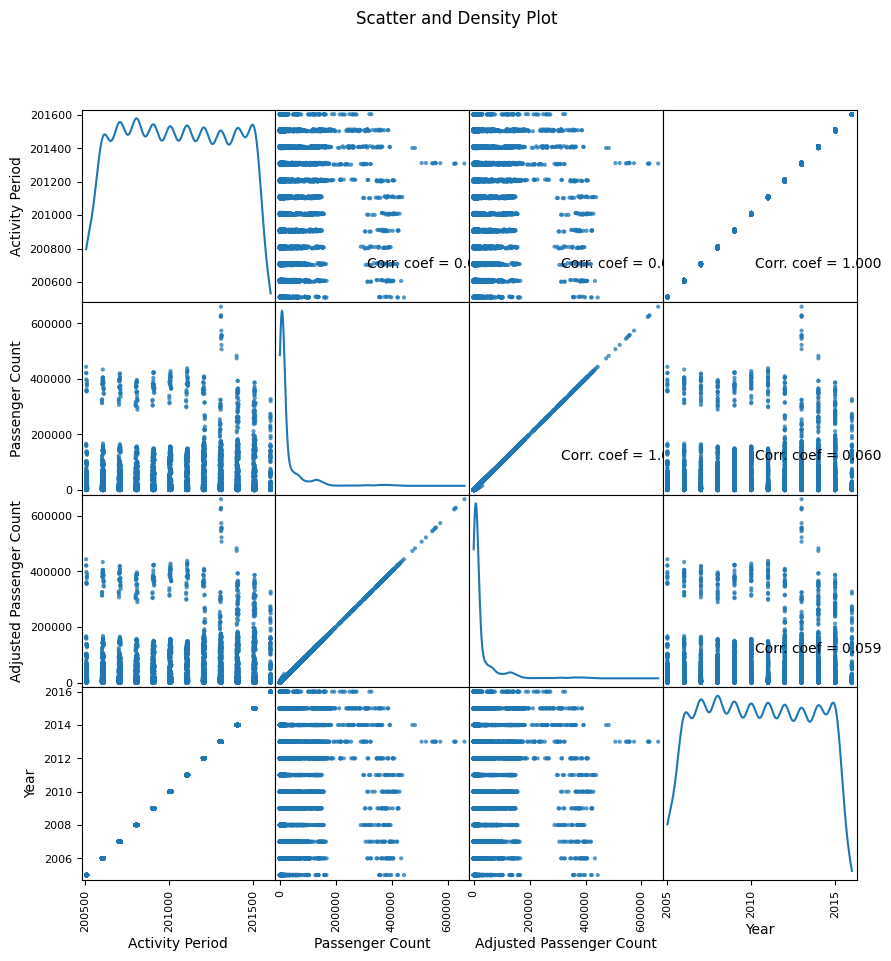

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])  # Keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis='columns')  # Corrected to use axis as a keyword argument
    df = df[[col for col in df if df[col].nunique() > 1]]  # Keep columns where there are more than 1 unique value
    columnNames = list(df)
    if len(columnNames) > 10:  # Reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*np.triu_indices_from(corrs, k=1)):  # Corrected to use np.triu_indices_from directly
        ax[i, j].annotate(f'Corr. coef = {corrs[i, j]:.3f}', (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

# Example call to the function:
# Assuming `df` is your DataFrame
plotScatterMatrix(df, 10, 10)


<ipython-input-58-bab8fb496109>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='pastel')


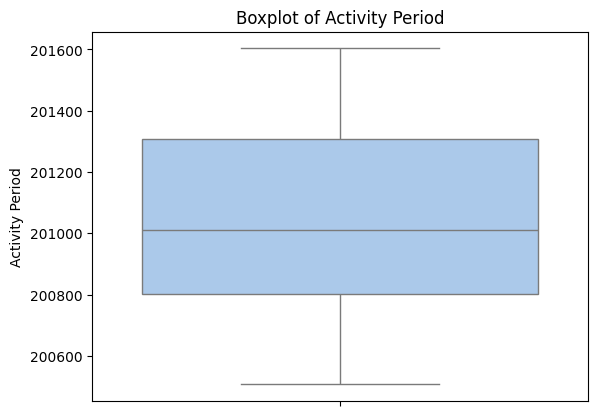

<ipython-input-58-bab8fb496109>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='pastel')


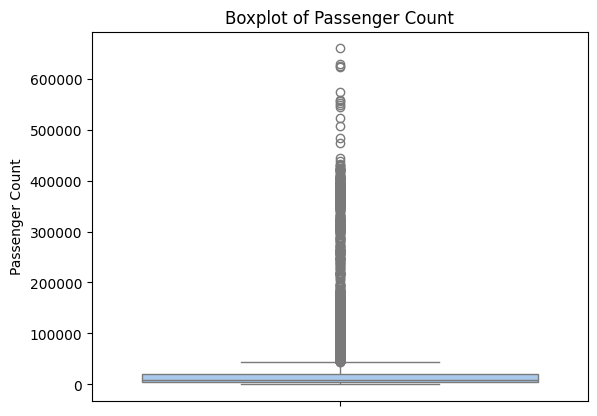

<ipython-input-58-bab8fb496109>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='pastel')


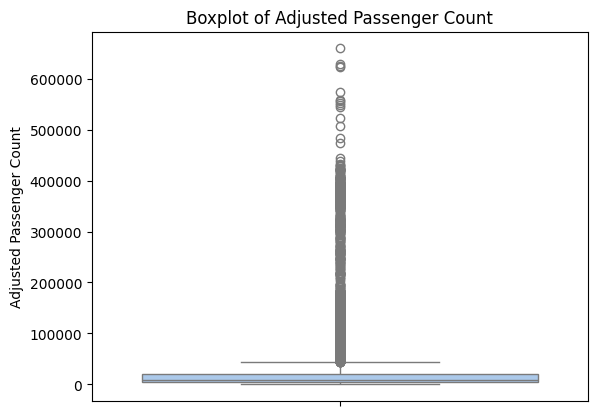

<ipython-input-58-bab8fb496109>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='pastel')


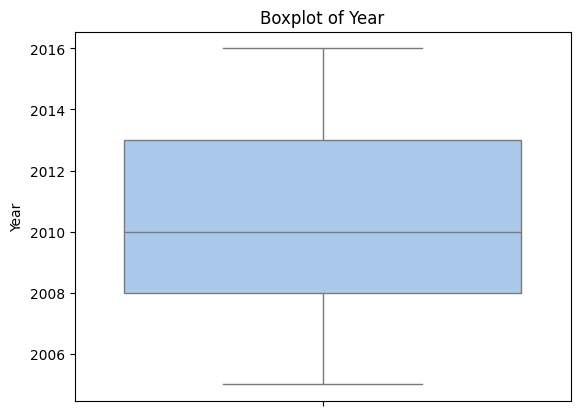

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in df.columns:
  if df[col].dtype != 'object':
    sns.boxplot(y=df[col], palette='pastel')
    plt.title(f'Boxplot of {col}')
    plt.show()

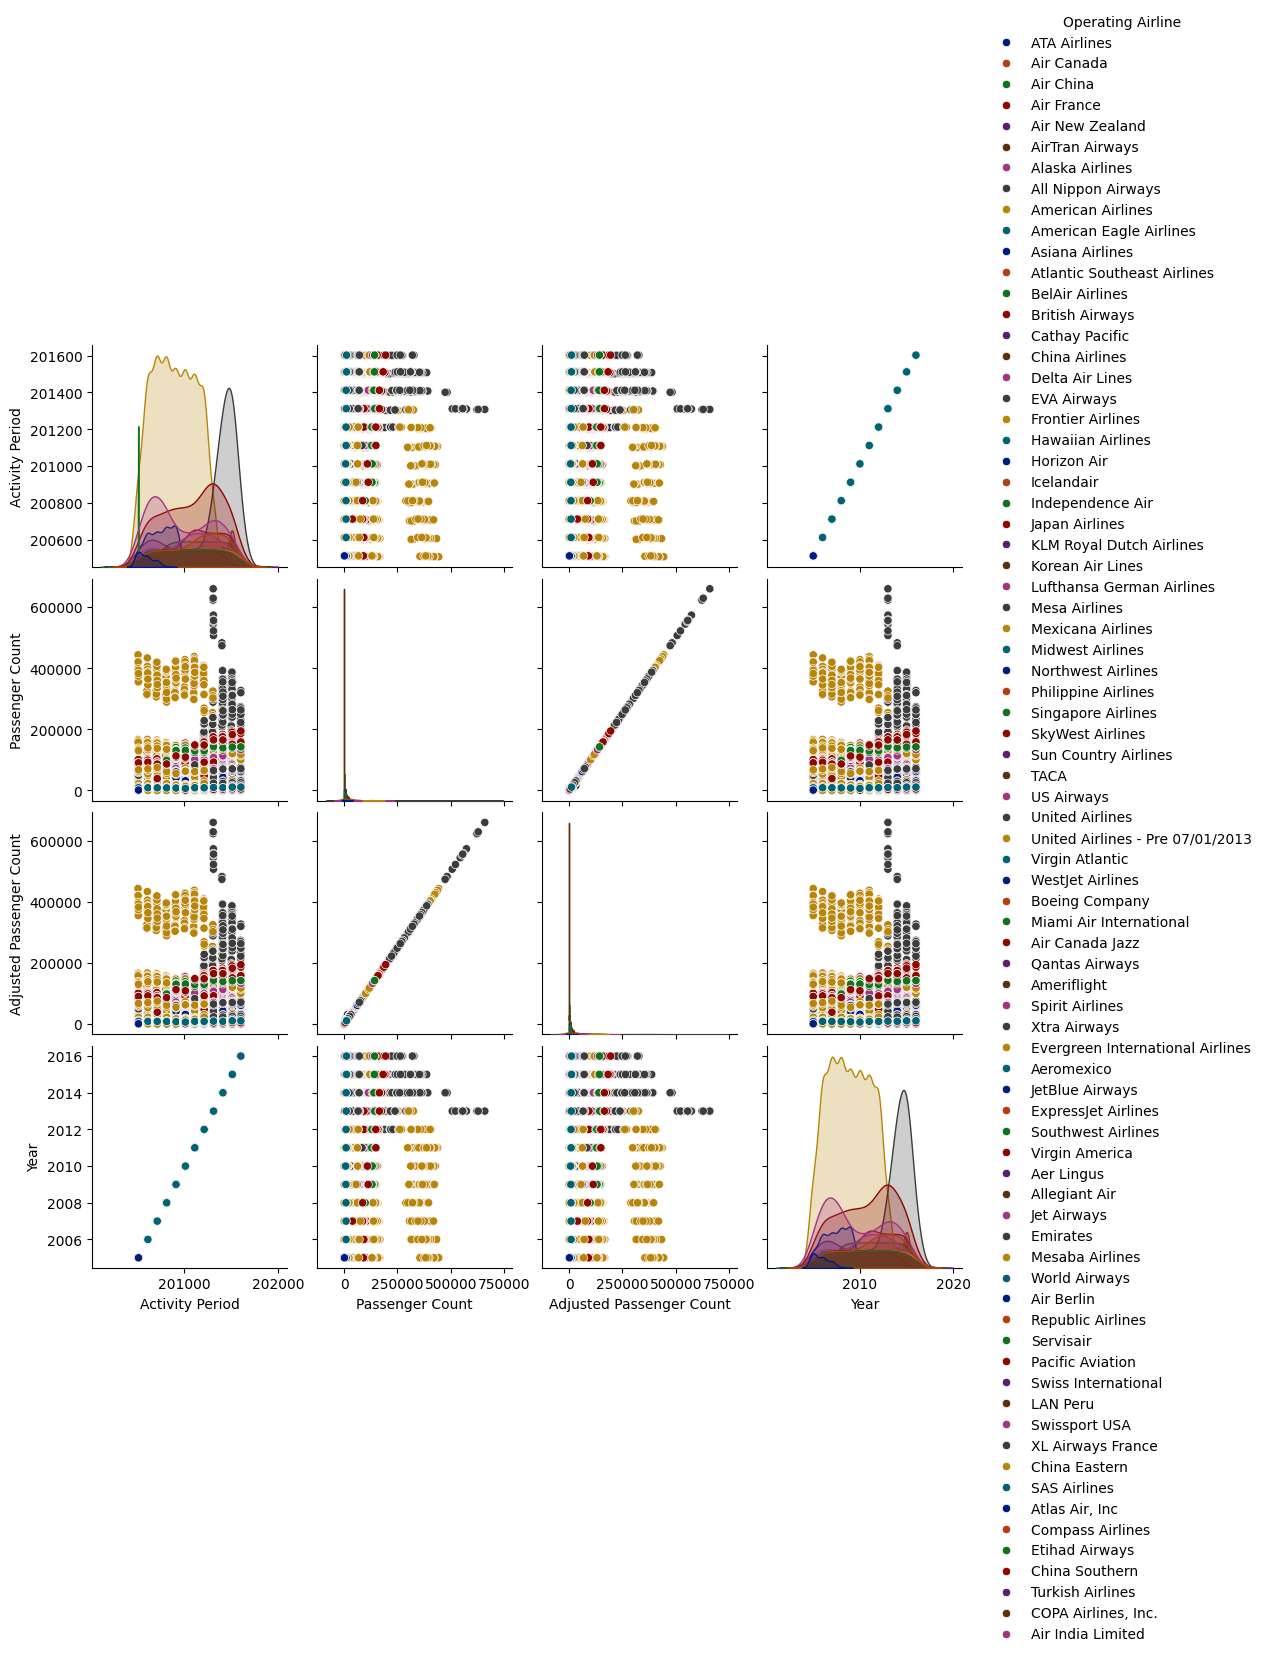

In [59]:
sns.pairplot(df, hue='Operating Airline', palette='dark')
plt.show()

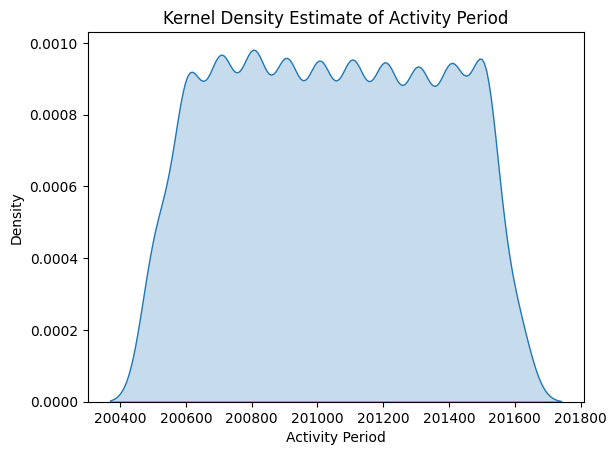

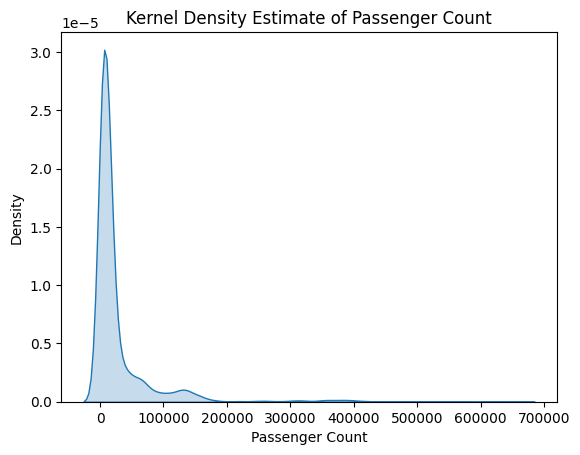

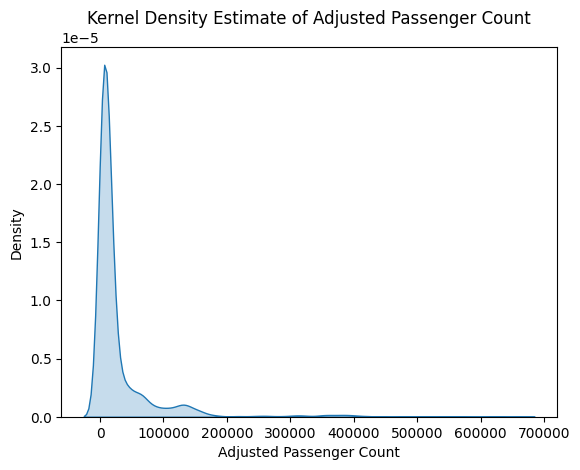

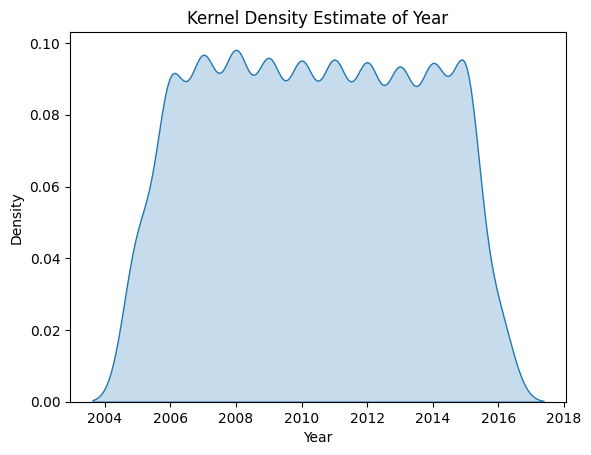

In [60]:
# prompt: generate code to do Kernel Density Estimate

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Select the numeric columns you want to plot
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Iterate over the numeric columns and create KDE plots
for col in numeric_cols:
  sns.kdeplot(df[col], fill=True)
  plt.title(f'Kernel Density Estimate of {col}')
  plt.show()


In [61]:
df.dtypes

Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
Adjusted Activity Type Code    object
Adjusted Passenger Count        int64
Year                            int64
Month                          object
dtype: object

In [62]:
numerical = [var for var in df.columns if df[var].dtype!='O'] #check numerical columns
categorical = [var for var in df.columns if df[var].dtype == 'O'] #check object columns

print('There are {} numerical variables'.format(len(numerical)))
print('There are {} categorical variables'.format(len(categorical)))

There are 4 numerical variables
There are 12 categorical variables


In [63]:
df1 = df.dropna()

print(df1.shape)

(14953, 16)


In [64]:
df1.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [65]:
grouped_by_airline = df1.groupby("Operating Airline").agg\
({
    "Operating Airline IATA Code" : "count",
    "Passenger Count" : lambda x : np.mean(x), #mean passengers count by airlines
    "Adjusted Passenger Count" : lambda x : np.mean(x) #mean adjusted passengerscount by airlines

})

grouped_by_airline.rename(columns = {"Operating Airline IATA Code" : "nb_flights",
                                   "Passenger Count" : "mean_passenger_count",
                                   "Adjusted Passenger Count" : "mean_adjusted_passenger_count"},
                          inplace = True)

grouped_by_airline = grouped_by_airline.sort_values(by = "nb_flights", ascending = False)

grouped_by_airline.head(10).round()

,nb_flights,mean_passenger_count,mean_adjusted_passenger_count
Operating Airline,,,
United Airlines - Pre 07/01/2013,2154,48915.0,49366.0
SkyWest Airlines,963,37084.0,37084.0
United Airlines,892,72732.0,72827.0
Alaska Airlines,751,17252.0,17565.0
Delta Air Lines,386,68498.0,68515.0
Air Canada,366,18252.0,18252.0
Virgin America,362,74405.0,74405.0
Southwest Airlines,309,81188.0,81223.0
US Airways,304,55318.0,55318.0


In [66]:
# To achieve your objectives, you can follow these steps for feature engineering and model development:

# 1. Peak Traffic Times of the Year
# Objective: Determine when passenger traffic is highest throughout the year.

# Feature Engineering:

# Extract time-based features such as month or quarter from the 'Activity Period' column.
# Calculate aggregate metrics such as total passenger counts per month or quarter to identify peak periods.
# Modeling Approach:

# Use descriptive statistics or machine learning models to predict peak traffic times.
# For example, aggregate passenger counts by month and identify the months with the highest average counts.

# 2. Geographical Locations with Most Available Flights
# Objective: Identify the geographical regions where flights are most frequent.

# Feature Engineering:

# Utilize 'GEO Region' or 'Operating Airline' columns to determine flight availability by region or airline.
# Aggregate flight counts or availability metrics by region.
# Modeling Approach:

# Use clustering algorithms or frequency analysis to determine regions with the highest flight availability.
# Calculate availability indices for each region based on historical data.

# 3. Likelihood of Flight Availability Prediction
# Objective: Predict the likelihood of flight availability based on peak traffic times and geographical availability.

# Feature Engineering:

# Combine features from steps 1 and 2, such as peak traffic periods and flight availability indices by region.
# Modeling Approach:

# Develop a predictive model (e.g., regression, classification) that considers time-based features (peak traffic times) and
#geographical features (flight availability).
# Train the model on historical data to predict the likelihood of flight availability given a specific time period and geographical region.

# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error

# # Assuming 'df' is your dataset with columns provided earlier

# # Feature Engineering for Peak Traffic Times
# df['Activity Period'] = pd.to_datetime(df['Activity Period'], format='%Y%m')
# df['Month'] = df['Activity Period'].dt.month

# # Aggregate passenger counts by month
# peak_traffic = df.groupby('Month')['Passenger Count'].sum()

# # Feature Engineering for Geographical Availability
# geo_availability = df.groupby('GEO Region').size().reset_index(name='Flight Count')

# # Merge peak traffic and geographical availability features
# df_merged = pd.merge(df, geo_availability, on='GEO Region', how='left')

# # Encode categorical variables
# label_encoder = LabelEncoder()
# df_merged['GEO Region'] = label_encoder.fit_transform(df_merged['GEO Region'])

# # Select features and target variable
# features = ['Month', 'GEO Region']
# target = 'Flight Count'

# X = df_merged[features]
# y = df_merged[target]

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Model training (example with Random Forest)
# model = RandomForestRegressor(random_state=42)
# model.fit(X_train, y_train)

# # Predictions
# y_pred = model.predict(X_test)

# # Evaluation
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')

# # Example of predicting flight availability likelihood
# # You can use the trained model to predict flight availability likelihood based on specific inputs (month and GEO Region)

# # Further refinement and analysis based on model performance and user requirements


# Summary:
# Feature Engineering: Extract time-based and geographical features, aggregate data, and encode categorical variables.
# Model Development: Train predictive models using historical data to predict peak traffic times, identify regions with
# high flight availability, and assess the likelihood of flight availability based on user inputs.
# By following these steps, you can build a model that provides insights into peak traffic times, geographical flight availability, and
# predicts flight availability likelihood for users booking flights. Adjust the approach based on specific data characteristics and
# model performance to achieve optimal results.

In [67]:
import pandas as pd
# Extract month from 'Activity Period' and calculate total passenger count per month
df['Activity Period'] = pd.to_datetime(df['Activity Period'], format='%Y%m')
df['Month'] = df['Activity Period'].dt.month
peak_traffic = df.groupby('Month')['Passenger Count'].sum().sort_values()

# Display in a DataFrame
peak_traffic_df = pd.DataFrame(peak_traffic).reset_index()
peak_traffic_df.columns = ['Month', 'Total Passenger Count']
print(peak_traffic_df)


    Month  Total Passenger Count
0       2               30444302
1       1               33087662
2       4               33106801
3      11               34988575
4       5               35558969
5      12               36162507
6       3               36787839
7       9               37256777
8       6               37721908
9      10               38391386
10      7               42552115
11      8               42753659


In [68]:
df1.head(4)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July


In [69]:
# prompt: Identify the geographical regions where flights are most frequent. arrange in descending order

# Group by 'GEO Region' and count the number of flights
geo_availability = df1.groupby('GEO Region').size().reset_index(name='Flight Count')

# Sort by 'Flight Count' in descending order
geo_availability_sorted = geo_availability.sort_values('Flight Count', ascending=False)

print(geo_availability_sorted)


            GEO Region  Flight Count
8                   US          5757
0                 Asia          3272
4               Europe          2078
2               Canada          1418
5               Mexico          1115
1  Australia / Oceania           737
3      Central America           272
6          Middle East           214
7        South America            90


In [70]:
# prompt: Identify the geographical regions where flights are most frequent. consider month as well. arrange in descending order . display in proper data frame

# Group by 'GEO Region' and 'Month', then count the number of flights
geo_month_availability = df1.groupby(['GEO Region', 'Month']).size().reset_index(name='Flight Count')

# Sort by 'Flight Count' in descending order
geo_month_availability_sorted = geo_month_availability.sort_values('Flight Count', ascending=False)

# Display in a DataFrame
print(geo_month_availability_sorted)


        GEO Region      Month  Flight Count
107             US  September           505
97              US     August           503
106             US    October           496
105             US   November           495
101             US       July           494
..             ...        ...           ...
94   South America    October             8
93   South America   November             8
92   South America        May             6
84   South America      April             6
90   South America       June             6

[108 rows x 3 columns]


In [71]:
# # prompt: Combine features from steps 1 and 2, such as peak traffic periods and flight availability indices by region.
# # Predict the likelihood of flight availability based on peak traffic times and geographical availability.

# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report

# import pandas as pd
# # Merge peak traffic and geographical availability features
# df_merged = pd.merge(df1, geo_availability, on='GEO Region', how='left')

# # Create a binary target variable for flight availability (1 if available, 0 otherwise)
# # You'll need to define a threshold for flight availability based on your business logic
# threshold = 500  # Example threshold, adjust as needed
# df_merged['Flight Available'] = (df_merged['Flight Count'] > threshold).astype(int)

# # Encode categorical variables
# label_encoder = LabelEncoder()
# df_merged['GEO Region'] = label_encoder.fit_transform(df_merged['GEO Region'])
# df_merged['Terminal'] = label_encoder.fit_transform(df_merged['Terminal'])
# df_merged['Boarding Area'] = label_encoder.fit_transform(df_merged['Boarding Area'])
# df_merged['Published Airline'] = label_encoder.fit_transform(df_merged['Published Airline'])
# df_merged['Published Airline IATA Code'] = label_encoder.fit_transform(df_merged['Published Airline IATA Code'])
# df_merged['GEO Summary'] = label_encoder.fit_transform(df_merged['GEO Summary'])
# df_merged['Operating Airline'] = label_encoder.fit_transform(df_merged['Operating Airline'])
# df_merged['Operating Airline IATA Code'] = label_encoder.fit_transform(df_merged['Operating Airline IATA Code'])

# # Select features and target variable
# features = ['Month', 'GEO Region', 'Terminal', 'Boarding Area', 'Published Airline', 'Published Airline IATA Code', 'GEO Summary', 'Operating Airline', 'Operating Airline IATA Code']
# target = 'Flight Available'

# X = df_merged[features]
# y = df_merged[target]

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Model training (example with Random Forest Classifier)
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Predictions
# y_pred = model.predict(X_test)

# # Evaluation
# from sklearn.metrics import accuracy_score, classification_report
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')
# print(classification_report(y_test, y_pred))

# # Example of predicting flight availability likelihood
# # You can use the trained model to predict flight availability likelihood based on specific inputs
# new_data = pd.DataFrame({
#     'Month': [12],  # Example month
#     'GEO Region': [label_encoder.transform(['US'])[0]],  # Example GEO Region, encoded
#     # ... other features ...
# })
# predicted_likelihood = model.predict_proba(new_data)[:, 1]  # Probability of flight being available
# print(f'Predicted Likelihood of Flight Availability: {predicted_likelihood[0]}')


In [72]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()
# Encode 'Operating Airline'
df1['Operating Airline Encoded'] = le.fit_transform(df1['Operating Airline'])
# Encode 'GEO Region'
df1['GEO Region Encoded'] = le.fit_transform(df1['GEO Region'])
# Encode 'Activity Type Code'
df1['Activity Type Code Encoded'] = le.fit_transform(df1['Activity Type Code'])
# Display the DataFrame with encoded columns
encoded_df = df1[['Operating Airline', 'Operating Airline Encoded',
                   'GEO Region', 'GEO Region Encoded',
                   'Activity Type Code', 'Activity Type Code Encoded']]
print(encoded_df)

      Operating Airline  Operating Airline Encoded GEO Region  \
0          ATA Airlines                          0         US   
1          ATA Airlines                          0         US   
2          ATA Airlines                          0         US   
3           Air Canada                           4     Canada   
4           Air Canada                           4     Canada   
...                 ...                        ...        ...   
15002    Virgin America                         67         US   
15003    Virgin America                         67     Mexico   
15004    Virgin America                         67     Mexico   
15005   Virgin Atlantic                         68     Europe   
15006   Virgin Atlantic                         68     Europe   

       GEO Region Encoded Activity Type Code  Activity Type Code Encoded  
0                       8           Deplaned                           0  
1                       8           Enplaned                         

<ipython-input-72-cc5c2eaea6ab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Operating Airline Encoded'] = le.fit_transform(df1['Operating Airline'])
<ipython-input-72-cc5c2eaea6ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['GEO Region Encoded'] = le.fit_transform(df1['GEO Region'])
<ipython-input-72-cc5c2eaea6ab>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [73]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()

# Encode 'Operating Airline'
df1.loc[:, 'Operating Airline Encoded'] = le.fit_transform(df1['Operating Airline'])

# Encode 'GEO Region'
df1.loc[:, 'GEO Region Encoded'] = le.fit_transform(df1['GEO Region'])

# Encode 'Activity Type Code'
df1.loc[:, 'Activity Type Code Encoded'] = le.fit_transform(df1['Activity Type Code'])

# Display the DataFrame with encoded columns
encoded_df = df1[['Operating Airline', 'Operating Airline Encoded',
                  'GEO Region', 'GEO Region Encoded',
                  'Activity Type Code', 'Activity Type Code Encoded']]

print(encoded_df)

      Operating Airline  Operating Airline Encoded GEO Region  \
0          ATA Airlines                          0         US   
1          ATA Airlines                          0         US   
2          ATA Airlines                          0         US   
3           Air Canada                           4     Canada   
4           Air Canada                           4     Canada   
...                 ...                        ...        ...   
15002    Virgin America                         67         US   
15003    Virgin America                         67     Mexico   
15004    Virgin America                         67     Mexico   
15005   Virgin Atlantic                         68     Europe   
15006   Virgin Atlantic                         68     Europe   

       GEO Region Encoded Activity Type Code  Activity Type Code Encoded  
0                       8           Deplaned                           0  
1                       8           Enplaned                         

In [74]:
# Create a binary target variable for flight availability (1 if available, 0 otherwise)
# You'll need to define a threshold for flight availability based on your business logic
threshold = 500  # Example threshold, adjust as needed

# Add a new column 'Flight Available' based on the threshold
df1.loc[:, 'Flight Available'] = (df1['Passenger Count'] > threshold).astype(int)

# Display the DataFrame to verify the new column
print(df1[['Passenger Count', 'Flight Available']])


       Passenger Count  Flight Available
0                27271                 1
1                29131                 1
2                 5415                 1
3                35156                 1
4                34090                 1
...                ...               ...
15002           194636                 1
15003             4189                 1
15004             4693                 1
15005            12313                 1
15006            10898                 1

[14953 rows x 2 columns]


<ipython-input-74-6a598ba768e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'Flight Available'] = (df1['Passenger Count'] > threshold).astype(int)


In [75]:
# prompt: Define features and target. features include 'Month', 'Year', 'GEO Region', 'Operating Airline', 'Activity Type Code'. target is flight available

# Select features and target variable
features = ['Month', 'GEO Region Encoded', 'Operating Airline Encoded', 'Activity Type Code Encoded']
target = 'Flight Available'

X = df1[features]
y = df1[target]

print(X.head())
print(y.head())


  Month  GEO Region Encoded  Operating Airline Encoded  \
0  July                   8                          0   
1  July                   8                          0   
2  July                   8                          0   
3  July                   2                          4   
4  July                   2                          4   

   Activity Type Code Encoded  
0                           0  
1                           1  
2                           2  
3                           0  
4                           1  
0    1
1    1
2    1
3    1
4    1
Name: Flight Available, dtype: int64


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test


In [77]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming df1 is your DataFrame and is already loaded

# Define the threshold for 'Flight Available'
threshold = 500  # Example threshold, adjust as needed
df1.loc[:, 'Flight Available'] = (df1['Passenger Count'] > threshold).astype(int)

# Encode categorical features
le = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Operating Airline', 'GEO Region', 'Activity Type Code']

for column in categorical_columns:
    df1.loc[:, column + ' Encoded'] = le.fit_transform(df1[column])

# Define feature columns and target variable
feature_columns = ['Operating Airline Encoded', 'GEO Region Encoded', 'Activity Type Code Encoded', 'Passenger Count']
target_column = 'Flight Available'

X = df1[feature_columns]
y = df1[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00      2861

    accuracy                           1.00      2991
   macro avg       1.00      1.00      1.00      2991
weighted avg       1.00      1.00      1.00      2991



In [84]:
# prompt: find accuracy of training and test data of random forest classifier model

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = model.predict(X_train)

# Predict on the test data
y_test_pred = model.predict(X_test)

# Calculate accuracy for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate accuracy for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 1.0
Test Accuracy: 1.0


In [78]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Assuming df1 is your DataFrame and is already loaded

# Define the threshold for 'Flight Available'
threshold = 500  # Example threshold, adjust as needed
df1.loc[:, 'Flight Available'] = (df1['Passenger Count'] > threshold).astype(int)

# Encode categorical features
le = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Operating Airline', 'GEO Region', 'Activity Type Code']

for column in categorical_columns:
    df1.loc[:, column + ' Encoded'] = le.fit_transform(df1[column])

# Define feature columns and target variable
feature_columns = ['Operating Airline Encoded', 'GEO Region Encoded', 'Activity Type Code Encoded', 'Passenger Count']
target_column = 'Flight Available'

X = df1[feature_columns]
y = df1[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check class distribution before SMOTE
print("Class distribution in training set before SMOTE:\n", y_train.value_counts())

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution in training set after SMOTE:\n", y_train_resampled.value_counts())

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Class distribution in training set before SMOTE:
 Flight Available
1    11390
0      572
Name: count, dtype: int64
Class distribution in training set after SMOTE:
 Flight Available
1    11390
0    11390
Name: count, dtype: int64
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00      2861

    accuracy                           1.00      2991
   macro avg       1.00      1.00      1.00      2991
weighted avg       1.00      1.00      1.00      2991

Confusion Matrix:
 [[ 130    0]
 [   0 2861]]


In [82]:
df1.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month,Operating Airline Encoded,GEO Region Encoded,Activity Type Code Encoded,Flight Available
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July,0,8,0,1
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July,0,8,1,1
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July,0,8,2,1
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July,4,2,0,1
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July,4,2,1,1


In [81]:
# prompt: make a prediction for december 2024 geo region US

import pandas as pd
# Assuming the LabelEncoder 'le' and the trained model 'model' are available from the previous code

# Create a DataFrame for the new data point
new_data = pd.DataFrame({
    'Operating Airline Encoded': [le.transform(['Air Canada'])[0]],  # Replace 'Your Airline' with the actual airline
    'GEO Region Encoded': [le.transform(['US'])[0]],
    'Activity Type Code Encoded': [le.transform(['Deplaned'])[0]],  # Assuming 'Deplaned' as the activity type
    'Passenger Count': [550]  # Example passenger count
})

# Predict the likelihood of flight availability
predicted_likelihood = model.predict_proba(new_data)[:, 1]

print(f'Predicted Likelihood of Flight Availability in December 2024 for GEO Region US: {predicted_likelihood[0]}')


ValueError: y contains previously unseen labels: 'Air Canada'